# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [147]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")


In [148]:
# Running info to get a basic overview of the dataframe
north_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [149]:
south_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [150]:
# Running head to get a sense of how the csv is set up
north_df.head(15)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


In [151]:
# Running unique to get unique values, even if it doesn't answer the question it's good to see them listed explicitly. 
# Initializing it as a variable to have it stored
uniqueNccReps = north_df['Rep ID'].unique()
print(uniqueNccReps)

['Brent' 'Cam' 'Todd' 'Duke' 'Joe' 'Lilly' 'Amanda' 'Andy' 'Xander']


In [152]:
# EDA Question 1A solution below:
# By running a simple len command of the unique values, we get our answer
# The answer is 9 reps in North Branch
len(uniqueNccReps)

9

#### EDA Question 1B:  How many reps are in the South branch?  

In [153]:
# EDA Question 1B solution Below:
# Run the same process as before
south_df.head(15)


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
5,5,South,Sales Support,1:00 PM,Incoming,D,Karl,NO,0,0,9,1,1.0,4,1
6,6,South,Product Support,11:00 AM,Incoming,C,Sandy,NO,0,0,8,1,1.0,2,1
7,7,South,Product Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,1,1.0,3,1
8,8,South,Product Support,2:00 PM,Incoming,D,Randy,NO,0,0,11,2,1.0,4,1
9,9,South,Product Support,3:00 PM,Incoming,D,George,NO,0,0,8,3,1.0,4,1


In [154]:
uniquesouth_dfReps = south_df['Rep ID'].unique()
print(uniqueSccReps)
len(uniqueSccReps)

# There are 11 Reps in the South Branch 

['Kate' 'Eric' 'Susan' 'Alice' 'Sandy' 'Karl' 'Randy' 'George' 'Helga'
 'Josh' 'Sharon']


11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [155]:
# EDA Question 2A solution Below:
# Average is a simple mean command, initializing all column averages as variables to print them later
# Rounding to 2 decimal places for readability purposes
averageNccBusy = north_df['Busy Minutes'].mean().round(decimals=2)
averageNccNotReady = north_df['Not Ready Minutes'].mean().round(decimals=2)
averageNccIncWait = north_df['Incoming Wait Time'].mean().round(decimals=2)
averageNccDuringWait = north_df['During Call Wait Time'].mean().round(decimals=2)

print(f'North Call Center Averages:\nBusy Minutes: {averageNccBusy}\nNot Ready Minutes: {averageNccNotReady}\nIncoming Wait Time: {averageNccIncWait}\nDuring Call Wait Time: {averageNccDuringWait}')

# North Call Center Averages:
# Busy Minutes: 9.99
# Not Ready Minutes: 1.91
# Incoming Wait Time: 3.05
# During Call Wait Time: 2.97

North Call Center Averages:
Busy Minutes: 9.99
Not Ready Minutes: 1.91
Incoming Wait Time: 3.05
During Call Wait Time: 2.97


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [156]:
# EDA Question 2B solution Below:
averageSccBusy = south_df['Busy Minutes'].mean().round(decimals=2)
averageSccNotReady = south_df['Not Ready Minutes'].mean().round(decimals=2)
averageSccIncWait = south_df['Incoming Wait Time'].mean().round(decimals=2)
averageSccDuringWait = south_df['During Call Wait Time'].mean().round(decimals=2)

print(f'South Call Center Averages:\nBusy Minutes: {averageSccBusy}\nNot Ready Minutes: {averageSccNotReady}\nIncoming Wait Time: {averageSccIncWait}\nDuring Call Wait Time: {averageSccDuringWait}')

# South Call Center Averages:
# Busy Minutes: 10.05
# Not Ready Minutes: 1.91
# Incoming Wait Time: 3.0
# During Call Wait Time: 3.08

South Call Center Averages:
Busy Minutes: 10.05
Not Ready Minutes: 1.91
Incoming Wait Time: 3.0
During Call Wait Time: 3.08


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [157]:
# EDA Question 3 solution Below:
# Running Value Counts and then sorting the index 
nccTimeBlockCounts = north_df['Time Block'].value_counts().sort_index()
print(nccTimeBlockCounts)

sccTimeBlockCounts = south_df['Time Block'].value_counts().sort_index()
print(sccTimeBlockCounts)

# This still does not solve the issue of 9:00 AM being at the bottom. While technically not necessary to answer the question, it does bother me. 

Time Block
10:00 AM    43
11:00 AM    25
12:00 PM    45
1:00 PM     17
2:00 PM     35
3:00 PM     30
4:00 PM     28
5:00 PM     17
9:00 AM      5
Name: count, dtype: int64
Time Block
10:00 AM    56
11:00 AM    31
12:00 PM    75
1:00 PM     23
2:00 PM     30
3:00 PM     43
4:00 PM     25
5:00 PM     26
9:00 AM      5
Name: count, dtype: int64


In [158]:
# Turning the Time Block from Index into its own column to allow it to be more easily manipulated/sorted
nccTimeBlockCountsTimeBlockColumn = nccTimeBlockCounts.reset_index()
nccTimeBlockCountsTimeBlockColumn.sort_values(by='Time Block')
print(nccTimeBlockCountsTimeBlockColumn)
# Running info to see what happens with the column
nccTimeBlockCountsTimeBlockColumn.info()
# Noting that Time Block is an object, not datetime, which is why it isn't sorting


  Time Block  count
0   10:00 AM     43
1   11:00 AM     25
2   12:00 PM     45
3    1:00 PM     17
4    2:00 PM     35
5    3:00 PM     30
6    4:00 PM     28
7    5:00 PM     17
8    9:00 AM      5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Time Block  9 non-null      object
 1   count       9 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 276.0+ bytes


In [159]:
# Using the to_datetime function of Pandas to convert it all to datetime and allow it to be properly sorted
nccTimeBlockCountsTimeBlockColumn['Time Block'] = pd.to_datetime(nccTimeBlockCountsTimeBlockColumn['Time Block'])

# Reassigning dataframe with Time Block Column as its properly time-sorted version
nccTimeBlockCountsTimeBlockColumn = nccTimeBlockCountsTimeBlockColumn.sort_values(by='Time Block')
nccTimeBlockCountsTimeBlockColumn


C:\Users\pyadr\AppData\Local\Temp\ipykernel_28036\3356954665.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nccTimeBlockCountsTimeBlockColumn['Time Block'] = pd.to_datetime(nccTimeBlockCountsTimeBlockColumn['Time Block'])


,Time Block,count
8,2025-12-07 09:00:00,5
0,2025-12-07 10:00:00,43
1,2025-12-07 11:00:00,25
2,2025-12-07 12:00:00,45
3,2025-12-07 13:00:00,17
4,2025-12-07 14:00:00,35
5,2025-12-07 15:00:00,30
6,2025-12-07 16:00:00,28
7,2025-12-07 17:00:00,17


In [160]:
#Now that this is done with north_df, it's time to do it with south_df as well 
sccTimeBlockCountsTimeBlockColumn = sccTimeBlockCounts.reset_index()
sccTimeBlockCountsTimeBlockColumn['Time Block'] = pd.to_datetime(sccTimeBlockCountsTimeBlockColumn['Time Block'])
sccTimeBlockCountsTimeBlockColumn = sccTimeBlockCountsTimeBlockColumn.sort_values(by='Time Block')
sccTimeBlockCountsTimeBlockColumn



C:\Users\pyadr\AppData\Local\Temp\ipykernel_28036\2110368806.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sccTimeBlockCountsTimeBlockColumn['Time Block'] = pd.to_datetime(sccTimeBlockCountsTimeBlockColumn['Time Block'])


,Time Block,count
8,2025-12-07 09:00:00,5
0,2025-12-07 10:00:00,56
1,2025-12-07 11:00:00,31
2,2025-12-07 12:00:00,75
3,2025-12-07 13:00:00,23
4,2025-12-07 14:00:00,30
5,2025-12-07 15:00:00,43
6,2025-12-07 16:00:00,25
7,2025-12-07 17:00:00,26


In [161]:
# Now to sum the two counts. Initializing a new dataframe to hold the values
combinedTimeBlockCounts = pd.DataFrame(columns=['Time Block', 'Combined Calls'])

# Using a for loop to add the values as a combined list
for t in range(len(sccTimeBlockCountsTimeBlockColumn['Time Block'])):
    combinedTimeBlockCounts.loc[t] = sccTimeBlockCountsTimeBlockColumn['Time Block'][t], (nccTimeBlockCountsTimeBlockColumn['count'][t] + sccTimeBlockCountsTimeBlockColumn['count'][t])

# Sorting the Time Block one last time
combinedTimeBlockCounts = combinedTimeBlockCounts.sort_values(by="Time Block")

# Outputting the new dataframe that holds combined list
combinedTimeBlockCounts

,Time Block,Combined Calls
8,2025-12-07 09:00:00,10
0,2025-12-07 10:00:00,99
1,2025-12-07 11:00:00,56
2,2025-12-07 12:00:00,120
3,2025-12-07 13:00:00,40
4,2025-12-07 14:00:00,65
5,2025-12-07 15:00:00,73
6,2025-12-07 16:00:00,53
7,2025-12-07 17:00:00,43


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [162]:
# Question 1 solution below
# Copying the code from data-manipulation-studio to see what % of each column is null
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%


In [163]:
# Doing the same for south_df
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


#### Record your answer below:

> **Your Answer:** 
> 
> After looking at both of these, there is in fact missing data in Incoming Wait Time column. Considerable missing data, in fact. However, since it's important to have accurate averages of that data, I am hesitant to do anything with it. Replacing null values with a string would force the whole column to be object type which might interfere with calculations, and replacing them with any number value would interfere with the math itself. So for now, we will leave them as they are, as the data in every other column is accurate. 

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [164]:
# Cleaning Question 2 solution below:
# Checking to verify that there are in fact two YES values:
north_df['Sale'].unique()

#Yes, there are two YES. One of them has a space after and that's why it's a different string

array(['NO', 'YES ', 'YES'], dtype=object)

In [165]:
# Stripping the empty spaces and running unique again to verify the strip, but not assigning variable yet just in case data is affected:
north_df['Sale'].str.rstrip().unique()

# We in fact got what we want, which is exclusively YES or NO, with no other answers

array(['NO', 'YES'], dtype=object)

In [166]:
# Now actually reassigning the value of the column to the stripped values:
north_df['Sale'] = north_df['Sale'].str.rstrip()

# Verifying with one last unique:
north_df['Sale'].unique()

array(['NO', 'YES'], dtype=object)

##### Record your answer by below:
> Your Answer: Ran unique to see what the multiple values for YES were. Realized that one was YES with a space after it. Ran rstrip to get rid of it, and verified that the strip took first before reassigning column data, then reassigned column data to the stripped version, so that only YES/NO strings with no spaces were values in the column. 

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [167]:
# Cleaning Question 3 solution below:
# Checking value counts of duplicates in north_df to see if there are any duplicates:
north_df.duplicated().value_counts()

# All values are false, there are no duplicates in the north_df dataframe

False    245
Name: count, dtype: int64

In [168]:
# Running the same on south_df
south_df.duplicated().value_counts()

# All values are false, there are no duplicates in south_df

False    314
Name: count, dtype: int64

In [169]:
# Just to ABSOLUTELY confirm, though, running drop duplicates with a new variable and making sure shape is the same
print(north_df.shape)
nccDropDupes = north_df.drop_duplicates()
print(nccDropDupes.shape)

# Now doing the same thing with south_df
print(south_df.shape)
sccDropDupes = south_df.drop_duplicates()
print(sccDropDupes.shape)

(245, 15)
(245, 15)
(314, 15)
(314, 15)


##### Record your answer below:
> Your Answer: There are no duplicated rows in either dataframe, so nothing needs to be done on that front.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [170]:
# Cleaning Question 4 solution below:
# Running head to once again look at the df
north_df.head()
# Unnamed: 0 is unnecessary because it is literally just the index values

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [171]:
# Dropping Unnamed: 0 from north_df
north_df = north_df.drop('Unnamed: 0', axis=1)
north_df.head()


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [172]:
# Doing the same for south_df
south_df = south_df.drop('Unnamed: 0', axis=1)
south_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


##### Record your answer below:
> Your Answer: The Unnamed: 0 column in both dataframes was just a duplicate of the index, so dropped it as it was unnecessary.

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [173]:
# Create dataframe for the entire company named df
# Starting by initializing df as north_df, so that it inherits all of the column data already and does not have to be manually specified:
df = north_df



In [174]:
# concat'ing the two dataframes together, specifically adding south_df to df:
# ignore_index set to true so that it is all just one continuous index, axis = 0 so that it is adding the rows in order and not adding additional columns
df = pd.concat([df, south_df], ignore_index=True, axis=0)

In [175]:
# Running df on its own just to see if the concat took properly, and with the way that the '...' skips all the way to the end of the df, it is useful in this case as the Branch 
# in the head of the df should be North, and in the tail of the df should be South

df

# df seems to have concat'd properly

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
555,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
556,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
557,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [176]:
# As one last verification, running df.shape to verify. If it did concat properly, then it should be 245+314 rows and still 14 columns. 245+314 is 559, so the shape we want to see is 559, 14
print(df.shape)

# It is what we expected. While it does also show in the previous output, I prefer to double check

(559, 14)


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [177]:
# Manipulation Question solution below:
# Create a new variable to store the grouped values. Group by Branch and rep ID, sum 'Calls" on that grouped Rep ID
groupedBranchRepID = df.groupby(['Branch','Rep ID'])['Calls'].sum()
groupedBranchRepID.sort_values(ascending=False)


Branch  Rep ID
North   Brent     37
South   Eric      35
        Randy     33
        Sandy     32
        Helga     31
North   Lilly     30
        Todd      29
South   George    29
        Kate      29
North   Duke      29
South   Karl      28
North   Joe       26
South   Susan     26
        Josh      26
        Sharon    25
North   Cam       24
        Xander    24
        Andy      23
        Amanda    23
South   Alice     20
Name: Calls, dtype: int64

In [178]:
# Additional verification, just to check in case there were duplicate names across the branches
# Previously, we established that there were 20 total reps (9 from north_df, 11 from south_df). Running a simple len of the groupby will tell us if all names are unique

# len of Branch/Rep ID:
print(len(groupedBranchRepID))

# This groups strictly the names, ignoring branch
groupedRepID = df.groupby('Rep ID')['Calls'].sum()
print(len(groupedRepID))

# We get 20 for both, which is what we were supposed to get. However, if both North and South branches had someone of the same name, this would have been incorrect, 
# as a groupby of just names would have combined those names into one group

20
20


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, 37
- South Branch = Eric, 35

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [ ]:
# Manipulation Question 2 solution below:
# First, just a simple mean to see abandonment rate for whole company (because Abandoned as a column is only 1's and 0's), 
# pulling from the joined dataframe of df. Rounding to 4 decimals so that the result can be multiplied by 100 to get a readable percentage value:
ovrAbandonedRate = df['Abandoned'].mean().round(decimals=4)
print(f'The Company-wide Abandoned Call rate is {ovrAbandonedRate*100}%')

The Company-wide Abandoned Call rate is 1.97%


In [ ]:
#Hard-coding the math just to make sure that the above numbers are correct

print(df['Abandoned'].value_counts())
print(11/(11+548))

Abandoned
0    548
1     11
Name: count, dtype: int64
0.01967799642218247


In [195]:
# Now, the abandoned call rate for the Branches, which is the above code just with a groupby. Technically, we could also simply run the above mean on the first two dataframes
# but the spirit of this part of the assignment seems to be running groupby
byBranchAbandonedRate = df.groupby('Branch')['Abandoned'].mean().round(decimals=4)
byBranchAbandonedRate
print(f'Call abandonment rate by branch:\nNorth: {byBranchAbandonedRate[0]*100}%\nSouth: {byBranchAbandonedRate[1]*100}%')

Call abandonment rate by branch:
North: 2.86%
South: 1.27%


C:\Users\pyadr\AppData\Local\Temp\ipykernel_28036\4089599120.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Call abandonment rate by branch:\nNorth: {byBranchAbandonedRate[0]*100}%\nSouth: {byBranchAbandonedRate[1]*100}%')


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? 
    - Yes, the company-wide Amabdonment Rate is lower than even the expected optimal range, primarily as a result of the South Branch having a minuscule 1.27% Abandonment Rate

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [ ]:
# Manipulation Question 3 solution below:
# First off, since we knew this column in both dataframes was the one to have null values, we need to see how many null values there are/aren't
df['Incoming Wait Time'].isnull().value_counts()

#There are 208 columns with a non-null value

Incoming Wait Time
True     351
False    208
Name: count, dtype: int64

In [ ]:
# Now running value_counts to see what each value is. Adding in dropna=False to verify that it once again pulls 351
df['Incoming Wait Time'].value_counts(dropna=False)

Incoming Wait Time
NaN    351
4.0     50
2.0     44
3.0     41
1.0     37
5.0     36
Name: count, dtype: int64

In [ ]:
# Sum the value counts with dropna still true to make sure that it sums to 208
df['Incoming Wait Time'].value_counts().sum()

# It does sum to 208, so we know that in any math involving the whole dataframe, the total (non filtered) count of values should be that number -- This is important because with the large
# amount of null values in this column, we need to be divising only by the total amount of Incoming Wait Time values that we have logged, and not overall call volume. 
# If we devide by overall call volume, then our numbers will look considerably better than they are in reality, at least of calls where we have the data logged. 

np.int64(208)

In [ ]:
# Making a new df where it's only values that have a Service Time of 2 or lower
dfGoodService = df[df['Incoming Wait Time'] <= 2]

# Running value_counts with dropna=False to make sure that no null values are included in this dataframe

dfGoodService['Incoming Wait Time'].value_counts(dropna=False)

Incoming Wait Time
2.0    44
1.0    37
Name: count, dtype: int64

In [215]:
# Now to divide the value counts of overall good service by overall number of logged Incoming Wait Times

# First off a print of sums of value_counts just to make sure we're getting whole numbers
print(dfGoodService['Incoming Wait Time'].value_counts().sum())
print(df['Incoming Wait Time'].value_counts().sum())

# Initializing them as variables
dfGoodServiceCount = dfGoodService['Incoming Wait Time'].value_counts().sum()
dfLoggedIncWaitTimeCount = df['Incoming Wait Time'].value_counts().sum()

# Printing the raw division output
print((dfGoodServiceCount/dfLoggedIncWaitTimeCount).round(decimals=4))

companyWideGoodServiceRate = (dfGoodServiceCount/dfLoggedIncWaitTimeCount).round(decimals=4)

81
208
0.3894


In [217]:
# A print with a properly-worded answer:

print(f'Out of {dfLoggedIncWaitTimeCount} company-wide total calls with logged Incoming Wait Time, {dfGoodServiceCount} of them were within the Service Target of 2 seconds\nThat is a percentage of {(companyWideGoodServiceRate*100).round(decimals=4)}%')

Out of 208 company-wide total calls with logged Incoming Wait Time, 81 of them were within the Service Target of 2 seconds
That is a percentage of 38.94%


In [ ]:
# It was at this moment that I realized that the aggregate functions include a count. Running groupby/count and initialzing it as a variable to divide by values later

northSouthIncWaitTimeLoggedCount = df.groupby('Branch')['Incoming Wait Time'].agg('count')
print(northSouthIncWaitTimeLoggedCount)

Branch
North     82
South    126
Name: Incoming Wait Time, dtype: int64


In [ ]:
# Initializing dataframe of North calls with good Service Level. While creating these dataframes are technically not necessary, I like having the intermediate step just in case

northGoodService = df[(df['Branch'] == 'North') & (df['Incoming Wait Time'] <= 2)]
northGoodService

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


In [ ]:
# Initializing the ratio as a variable and then printing it within a message

northGoodServiceRatio = (northGoodService['Incoming Wait Time'].agg('count')/northSouthIncWaitTimeLoggedCount[0]).round(decimals=4)
#print(northGoodServiceRatio)

print(f'Out of {northSouthIncWaitTimeLoggedCount[0]} North Center total calls with logged Incoming Wait Time, {northGoodService['Incoming Wait Time'].agg('count')} of them were within the Service Target of 2 seconds\nThat is a percentage of {(northGoodServiceRatio*100).round(decimals=4)}%')

Out of 82 North Center total calls with logged Incoming Wait Time, 33 of them were within the Service Target of 2 seconds
That is a percentage of 40.24%


C:\Users\pyadr\AppData\Local\Temp\ipykernel_28036\296604602.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  northGoodServiceRatio = (northGoodService['Incoming Wait Time'].agg('count')/northSouthIncWaitTimeLoggedCount[0]).round(decimals=4)
C:\Users\pyadr\AppData\Local\Temp\ipykernel_28036\296604602.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Out of {northSouthIncWaitTimeLoggedCount[0]} North Center total calls with logged Incoming Wait Time, {northGoodService['Incoming Wait Time'].agg('count')} of them were within the Service Target of 2 seconds\nThat is a percentage of {(northGoodServiceRatio*100

In [ ]:
# Initializing South Good Service

southGoodService = df[(df['Branch'] == 'South') & (df['Incoming Wait Time'] <= 2)]
southGoodService

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
245,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
246,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
247,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
248,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
249,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
250,South,Sales Support,1:00 PM,Incoming,D,Karl,NO,0,0,9,1,1.0,4,1
251,South,Product Support,11:00 AM,Incoming,C,Sandy,NO,0,0,8,1,1.0,2,1
252,South,Product Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,1,1.0,3,1
253,South,Product Support,2:00 PM,Incoming,D,Randy,NO,0,0,11,2,1.0,4,1
254,South,Product Support,3:00 PM,Incoming,D,George,NO,0,0,8,3,1.0,4,1


In [237]:
southGoodServiceRatio = (southGoodService['Incoming Wait Time'].agg('count')/northSouthIncWaitTimeLoggedCount[1]).round(decimals=4)
#print(southGoodServiceRatio)

print(f'Out of {northSouthIncWaitTimeLoggedCount[1]} South Center total calls with logged Incoming Wait Time, {southGoodService['Incoming Wait Time'].agg('count')} of them were within the Service Target of 2 seconds\nThat is a percentage of {(southGoodServiceRatio*100).round(decimals=4)}%')

Out of 126 South Center total calls with logged Incoming Wait Time, 48 of them were within the Service Target of 2 seconds
That is a percentage of 38.1%


C:\Users\pyadr\AppData\Local\Temp\ipykernel_28036\16327106.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  southGoodServiceRatio = (southGoodService['Incoming Wait Time'].agg('count')/northSouthIncWaitTimeLoggedCount[1]).round(decimals=4)
C:\Users\pyadr\AppData\Local\Temp\ipykernel_28036\16327106.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Out of {northSouthIncWaitTimeLoggedCount[1]} South Center total calls with logged Incoming Wait Time, {southGoodService['Incoming Wait Time'].agg('count')} of them were within the Service Target of 2 seconds\nThat is a percentage of {(southGoodServiceRatio*100).

##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24% -- 33 within Service Level, 82 total that were logged.
- South Branch = 38.1% -- 48 within Service Level, 126 total that were logged.
- Company Wide = 38.94% -- 81 within Service Level, 208 total that were logged.

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [ ]:
# Manipulation Question 4 solution below:

# First, a simple mean of the Incoming Wait Time column. Hard-coding skipna=True even though skipping na values is default just to double verify that nulls are not counted
df['Incoming Wait Time'].mean(skipna=True).round(decimals=2)

np.float64(3.02)

In [243]:
# Running simple agg mean from groupby to get the answers

df.groupby('Branch')['Incoming Wait Time'].agg('mean').round(decimals=2)

Branch
North    3.05
South    3.00
Name: Incoming Wait Time, dtype: float64

In [248]:
# Printing from the individual dataframes just to double check and verify groupby worked correctly

print(north_df['Incoming Wait Time'].mean().round(decimals=2))
print(south_df['Incoming Wait Time'].mean().round(decimals=2))

# It did work correctly

3.05
3.0


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.02

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

C:\Users\pyadr\AppData\Local\Temp\ipykernel_28036\3442148743.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = (queue_dict["Abandoned"][i] / queue_dict["Calls"][i] ) * 100


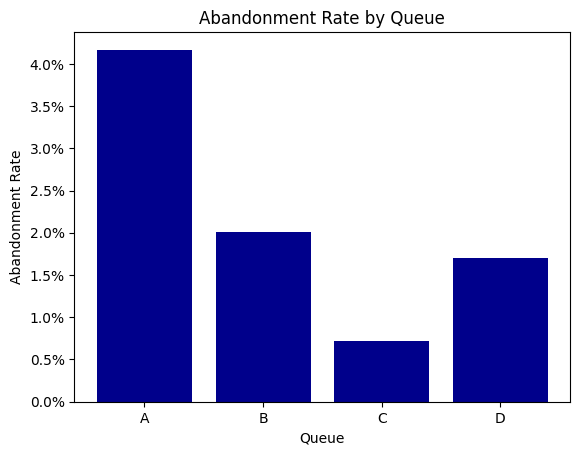

In [294]:
# Create visualization 1 here
# Import any additional libraries needed with alias
# NOTE: it very much bothered me that the Y axis did not display as a percent so I googled how to do it, and found the following: 

from matplotlib.ticker import PercentFormatter
# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    # Adding a multiplier of 100 to get a percentage instead of just a decimal
    abandonment_rates[queues[i]] = (queue_dict["Abandoned"][i] / queue_dict["Calls"][i] ) * 100

#Your code below:
# X axis is the keys of the dictionary, y axis is the values
plt.bar(abandonment_rates.keys(), abandonment_rates.values(), color='darkblue')

# Title and X/Y labels are self explanatory
plt.title("Abandonment Rate by Queue")
plt.xlabel("Queue")
plt.ylabel("Abandonment Rate")

# Using aforementioned googling to convert the float Y axis values into percentages:

plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=1))
plt.show()




##### Record your answer below:

> Chart style you chose and why: I chose a bar chart because what was necessary was seeing the disparity in Abandonment Rate by Queue type, and a bar chart shows that most easily to the viewer. 

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

C:\Users\pyadr\AppData\Local\Temp\ipykernel_28036\3422954746.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(north_plt['Rep ID'][i], (north_plt['Incoming Wait Time'][i], service_level["Service Level %"][i]))


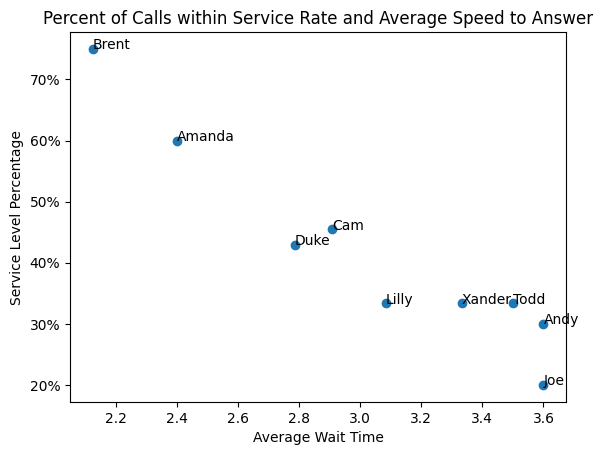

In [329]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:

#print(north_plt)
#print(service_level)

# It was a little bit difficult to parse what all was the correct information that needed to be used in this chart, but after printing out the different dataframes throughout it made more 
# sense that it's basically a lot of math to get to service %, but the mean wait time is right there at the top

i = 0
plt.scatter(north_plt['Incoming Wait Time'], service_level["Service Level %"])

# Googled how to annotate plots because it seemed useful instead of unnamed dots. Originally was a for loop with enumerate becasue that's what the example on StackOverflow was, 
# but couldn't get it to work, so made it a while loop instead
while i <= 8:
    plt.annotate(north_plt['Rep ID'][i], (north_plt['Incoming Wait Time'][i], service_level["Service Level %"][i]))
    i += 1
plt.xlabel("Average Wait Time")
plt.ylabel("Service Level Percentage")
plt.title("Percent of Calls within Service Rate and Average Speed to Answer")

# Once again, setting y axis as a percentage
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.show()


##### Record your answer below:

> Chart style you chose and why: I chose a scatterplot because we were wanting to show two separate critera per data point, but they weren't showing anything over time. So a scatterplot felt like the most useful. Brent is good at his job. 

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

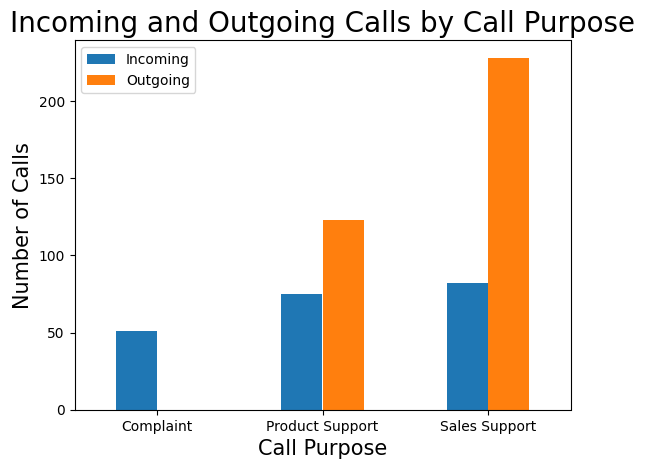

In [423]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
#print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:

# Printing the dictionaries just to verify what the dictionaries are
#print(complaints)
#print(sales_support)
#print(product_support)

#I think I spent legitimately two and a half hours on this question trying to emulate the examples online and in the prior exercise before finding the .plot method. Still legitimately do not
# have an idea how to make a grouped bar chart from that documentation. 

# Making a list of dictionaries in one variable, to be turned into a dataframe
incOutCallData = [complaints, sales_support, product_support]

# Making an arange for future use for label spacing
x = np.arange(len(incOutCallData))

# Turning the above list into a dataframe
incOutDF = pd.DataFrame(incOutCallData)

# Running dataframe.plot with kind='bar' to make a grouped bar chart

pd.DataFrame(incOutDF).plot(kind='bar')
plt.title("Incoming and Outgoing Calls by Call Purpose", fontsize=20)
plt.xlabel('Call Purpose', fontsize=15)
plt.ylabel('Number of Calls', fontsize=15)
plt.xticks(x, call_purpose)
# Rotation set to 0 as the labels are pretty text-long, and it's more readable even if the x label is a little close for my liking
plt.xticks(rotation=0)
plt.legend(['Incoming', 'Outgoing'])
plt.show()

##### Record your answer below:

> Chart style you chose and why: I chose a grouped bar chart, because this was again showing multiple data points per subject (in this case Call Purpose instead of the actual Rep ID), and it felt best to group the data by incoming/outgoing on each Call Purpose, all in one chart with the same scale so that both the overall call volume of each Purpose is easy to see, but also the ratio of each within each Purpose group. I considered briefly grouping by incoming/outgoing and having two clusters of three instead of three clusters of two, but this one felt much more visually appealing and intuitive. 

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: So this is an interesting one, because South has a considerably lower abandonment rate than North, but North has a higher Service Target %. Even with that higher Service Target %, the South still has a lower average speed of answer. Because of that and the higher overall volume of calls that South takes, I'm going to go ahead and give it to them. North has Brent, though. And that's a lot to work with. 



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: Given the more than double rate of Abandoned Calls, North could take the help on that metric alone. They also have a higher average speed of answer, and are kind of carried by Brent being head-and-shoulders better than everyone else. They both need additional bodies and for the lower-performing members to receive training to improve their metrics. 


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: We don't have actual call time of the calls themselves, nor the wait time of the customer on the line to get to the point that the next Rep is able to take their call (only the length of time from Rep available to Rep answering). Which is kind of a massive hole that analysis like this needs filled. First Call Resolution vs Escalation would also be very nice to have. 


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:
callTimesCalls = call_times.groupby(['Time Block', "Call Purpose", 'Incoming or Outgoing'])['Calls'].agg('count')
callTimesCalls
# Use groupby and get_group to select which call purpose to plot:

Time Block  Call Purpose   
10:00 AM    Complaint           6
            Product Support    20
            Sales Support      73
11:00 AM    Complaint           3
            Product Support    26
            Sales Support      27
12:00 PM    Complaint          11
            Product Support    60
            Sales Support      49
1:00 PM     Complaint           6
            Product Support    16
            Sales Support      18
2:00 PM     Complaint           5
            Product Support    50
            Sales Support      10
3:00 PM     Complaint           6
            Product Support    61
            Sales Support       6
4:00 PM     Complaint           3
            Product Support    40
            Sales Support      10
5:00 PM     Complaint           6
            Product Support    32
            Sales Support       5
9:00 AM     Complaint           5
            Product Support     5
Name: Calls, dtype: int64